
## Image Classfication


## Importing the libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, Conv2D, Conv3D, Dropout, MaxPooling1D, MaxPooling2D, MaxPooling3D, AveragePooling1D, AveragePooling2D, AveragePooling3D, BatchNormalization


2022-01-24 19:04:25.344697: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-24 19:04:25.344713: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Start stopwatch

In [2]:

from time import process_time
time_start = process_time() 


## Import the dataset

In [3]:

X = pd.read_csv('/home/vitor/Documents/TACS/MLhub/data/cnn/features.csv')
y = pd.read_csv('/home/vitor/Documents/TACS/MLhub/data/cnn/labels.csv')


## Splitting the dataset into the Training set and Test set

In [4]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.1,
                        train_size=None,
                        random_state=0,
                        shuffle=0,
                        stratify=X if "None" == "features" else y if "None" == "labels" else None)
y_true = y_test


## Data preprocessing

In [5]:

def data_preprocessing(X, y):

    out_y = keras.utils.to_categorical(y)

    num_images = X.shape[0]
    x_as_array = X.values[:,0:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

X_train, y_train = data_preprocessing(X_train, y_train)
X_test, y_test = data_preprocessing(X_test, y_test)


## Build the model

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=[3, 3], activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D([2, 2]))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=[3, 3], activation="relu"))
model.add(MaxPooling2D([2, 2]))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=[3, 3], activation="relu"))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))


model.compile(
            loss=keras.losses.CategoricalCrossentropy(),
            optimizer=keras.optimizers.Adam(),
            metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

2022-01-24 19:04:27.714762: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-24 19:04:27.714781: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-24 19:04:27.714794: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vitor-x1): /proc/driver/nvidia/version does not exist
2022-01-24 19:04:27.714972: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training the model on the Training set

In [7]:

history = model.fit(X_train, y_train,
                  batch_size=128,
                  epochs=2,
                  validation_split=0.1)


Epoch 1/2


  1/254 [..............................] - ETA: 1:56 - loss: 2.3066 - accuracy: 0.1172

  3/254 [..............................] - ETA: 12s - loss: 2.3021 - accuracy: 0.1328 

  5/254 [..............................] - ETA: 11s - loss: 2.2811 - accuracy: 0.1453

  7/254 [..............................] - ETA: 10s - loss: 2.2701 - accuracy: 0.1551

  9/254 [>.............................] - ETA: 10s - loss: 2.2516 - accuracy: 0.1745

 11/254 [>.............................] - ETA: 10s - loss: 2.2183 - accuracy: 0.1974

 13/254 [>.............................] - ETA: 10s - loss: 2.1770 - accuracy: 0.2212

 15/254 [>.............................] - ETA: 10s - loss: 2.1322 - accuracy: 0.2391

 17/254 [=>............................] - ETA: 10s - loss: 2.0816 - accuracy: 0.2583

 19/254 [=>............................] - ETA: 9s - loss: 2.0311 - accuracy: 0.2751 

 21/254 [=>............................] - ETA: 9s - loss: 1.9840 - accuracy: 0.2861

 23/254 [=>............................] - ETA: 9s - loss: 1.9372 - accuracy: 0.2999

 25/254 [=>............................] - ETA: 9s - loss: 1.8917 - accuracy: 0.3137

 27/254 [==>...........................] - ETA: 9s - loss: 1.8472 - accuracy: 0.3284

 29/254 [==>...........................] - ETA: 9s - loss: 1.8130 - accuracy: 0.3397

 31/254 [==>...........................] - ETA: 9s - loss: 1.7782 - accuracy: 0.3546

 33/254 [==>...........................] - ETA: 9s - loss: 1.7432 - accuracy: 0.3665

 35/254 [===>..........................] - ETA: 9s - loss: 1.7117 - accuracy: 0.3730

 37/254 [===>..........................] - ETA: 9s - loss: 1.6810 - accuracy: 0.3834

 39/254 [===>..........................] - ETA: 8s - loss: 1.6563 - accuracy: 0.3934

 41/254 [===>..........................] - ETA: 8s - loss: 1.6299 - accuracy: 0.4013

 43/254 [====>.........................] - ETA: 8s - loss: 1.6051 - accuracy: 0.4090

 45/254 [====>.........................] - ETA: 8s - loss: 1.5791 - accuracy: 0.4174

 47/254 [====>.........................] - ETA: 8s - loss: 1.5572 - accuracy: 0.4237

 49/254 [====>.........................] - ETA: 8s - loss: 1.5343 - accuracy: 0.4326

 51/254 [=====>........................] - ETA: 8s - loss: 1.5189 - accuracy: 0.4373

 53/254 [=====>........................] - ETA: 8s - loss: 1.5004 - accuracy: 0.4455

 55/254 [=====>........................] - ETA: 8s - loss: 1.4818 - accuracy: 0.4514

 57/254 [=====>........................] - ETA: 8s - loss: 1.4642 - accuracy: 0.4568

 59/254 [=====>........................] - ETA: 8s - loss: 1.4461 - accuracy: 0.4642

 61/254 [======>.......................] - ETA: 8s - loss: 1.4330 - accuracy: 0.4684

 62/254 [======>.......................] - ETA: 8s - loss: 1.4241 - accuracy: 0.4722

 64/254 [======>.......................] - ETA: 8s - loss: 1.4097 - accuracy: 0.4777

 66/254 [======>.......................] - ETA: 8s - loss: 1.3945 - accuracy: 0.4834

 67/254 [======>.......................] - ETA: 8s - loss: 1.3865 - accuracy: 0.4871

 68/254 [=======>......................] - ETA: 8s - loss: 1.3770 - accuracy: 0.4907

 69/254 [=======>......................] - ETA: 7s - loss: 1.3687 - accuracy: 0.4931

 70/254 [=======>......................] - ETA: 7s - loss: 1.3619 - accuracy: 0.4956

 72/254 [=======>......................] - ETA: 7s - loss: 1.3510 - accuracy: 0.4990

 74/254 [=======>......................] - ETA: 7s - loss: 1.3367 - accuracy: 0.5045

 76/254 [=======>......................] - ETA: 7s - loss: 1.3245 - accuracy: 0.5083

 78/254 [========>.....................] - ETA: 7s - loss: 1.3115 - accuracy: 0.5138

 79/254 [========>.....................] - ETA: 7s - loss: 1.3040 - accuracy: 0.5167

 80/254 [========>.....................] - ETA: 7s - loss: 1.2980 - accuracy: 0.5188

 82/254 [========>.....................] - ETA: 7s - loss: 1.2854 - accuracy: 0.5236

 84/254 [========>.....................] - ETA: 7s - loss: 1.2742 - accuracy: 0.5277

 85/254 [=========>....................] - ETA: 7s - loss: 1.2678 - accuracy: 0.5302

 87/254 [=========>....................] - ETA: 7s - loss: 1.2557 - accuracy: 0.5347

 89/254 [=========>....................] - ETA: 7s - loss: 1.2466 - accuracy: 0.5379

 91/254 [=========>....................] - ETA: 7s - loss: 1.2373 - accuracy: 0.5414

 93/254 [=========>....................] - ETA: 7s - loss: 1.2279 - accuracy: 0.5454

 95/254 [==========>...................] - ETA: 7s - loss: 1.2187 - accuracy: 0.5487

 97/254 [==========>...................] - ETA: 6s - loss: 1.2085 - accuracy: 0.5522

 99/254 [==========>...................] - ETA: 6s - loss: 1.2008 - accuracy: 0.5553

101/254 [==========>...................] - ETA: 6s - loss: 1.1931 - accuracy: 0.5582

103/254 [===========>..................] - ETA: 6s - loss: 1.1847 - accuracy: 0.5610

105/254 [===========>..................] - ETA: 6s - loss: 1.1751 - accuracy: 0.5647

107/254 [===========>..................] - ETA: 6s - loss: 1.1665 - accuracy: 0.5684

109/254 [===========>..................] - ETA: 6s - loss: 1.1601 - accuracy: 0.5702

111/254 [============>.................] - ETA: 6s - loss: 1.1545 - accuracy: 0.5718

113/254 [============>.................] - ETA: 6s - loss: 1.1462 - accuracy: 0.5754

115/254 [============>.................] - ETA: 6s - loss: 1.1386 - accuracy: 0.5785

117/254 [============>.................] - ETA: 6s - loss: 1.1322 - accuracy: 0.5808

119/254 [=============>................] - ETA: 5s - loss: 1.1251 - accuracy: 0.5830

121/254 [=============>................] - ETA: 5s - loss: 1.1210 - accuracy: 0.5844

123/254 [=============>................] - ETA: 5s - loss: 1.1149 - accuracy: 0.5866

125/254 [=============>................] - ETA: 5s - loss: 1.1090 - accuracy: 0.5889

127/254 [==============>...............] - ETA: 5s - loss: 1.1030 - accuracy: 0.5912

129/254 [==============>...............] - ETA: 5s - loss: 1.0958 - accuracy: 0.5941

131/254 [==============>...............] - ETA: 5s - loss: 1.0911 - accuracy: 0.5957

133/254 [==============>...............] - ETA: 5s - loss: 1.0856 - accuracy: 0.5980

135/254 [==============>...............] - ETA: 5s - loss: 1.0805 - accuracy: 0.5997

137/254 [===============>..............] - ETA: 5s - loss: 1.0764 - accuracy: 0.6010

138/254 [===============>..............] - ETA: 5s - loss: 1.0734 - accuracy: 0.6021

140/254 [===============>..............] - ETA: 5s - loss: 1.0697 - accuracy: 0.6039

141/254 [===============>..............] - ETA: 4s - loss: 1.0677 - accuracy: 0.6045

142/254 [===============>..............] - ETA: 4s - loss: 1.0647 - accuracy: 0.6056

143/254 [===============>..............] - ETA: 4s - loss: 1.0627 - accuracy: 0.6065

145/254 [================>.............] - ETA: 4s - loss: 1.0579 - accuracy: 0.6080

147/254 [================>.............] - ETA: 4s - loss: 1.0525 - accuracy: 0.6098

148/254 [================>.............] - ETA: 4s - loss: 1.0503 - accuracy: 0.6105

150/254 [================>.............] - ETA: 4s - loss: 1.0448 - accuracy: 0.6126

152/254 [================>.............] - ETA: 4s - loss: 1.0405 - accuracy: 0.6139

154/254 [=================>............] - ETA: 4s - loss: 1.0351 - accuracy: 0.6156

156/254 [=================>............] - ETA: 4s - loss: 1.0308 - accuracy: 0.6174

158/254 [=================>............] - ETA: 4s - loss: 1.0254 - accuracy: 0.6196

159/254 [=================>............] - ETA: 4s - loss: 1.0234 - accuracy: 0.6202

161/254 [==================>...........] - ETA: 4s - loss: 1.0181 - accuracy: 0.6220

162/254 [==================>...........] - ETA: 4s - loss: 1.0158 - accuracy: 0.6230

164/254 [==================>...........] - ETA: 4s - loss: 1.0107 - accuracy: 0.6248

165/254 [==================>...........] - ETA: 3s - loss: 1.0086 - accuracy: 0.6255

166/254 [==================>...........] - ETA: 3s - loss: 1.0064 - accuracy: 0.6263

167/254 [==================>...........] - ETA: 3s - loss: 1.0042 - accuracy: 0.6271

169/254 [==================>...........] - ETA: 3s - loss: 1.0004 - accuracy: 0.6288

171/254 [===================>..........] - ETA: 3s - loss: 0.9961 - accuracy: 0.6304

173/254 [===================>..........] - ETA: 3s - loss: 0.9908 - accuracy: 0.6322

175/254 [===================>..........] - ETA: 3s - loss: 0.9861 - accuracy: 0.6338

176/254 [===================>..........] - ETA: 3s - loss: 0.9851 - accuracy: 0.6343

178/254 [====================>.........] - ETA: 3s - loss: 0.9831 - accuracy: 0.6348

179/254 [====================>.........] - ETA: 3s - loss: 0.9808 - accuracy: 0.6356

180/254 [====================>.........] - ETA: 3s - loss: 0.9797 - accuracy: 0.6360

182/254 [====================>.........] - ETA: 3s - loss: 0.9769 - accuracy: 0.6366

183/254 [====================>.........] - ETA: 3s - loss: 0.9752 - accuracy: 0.6370

184/254 [====================>.........] - ETA: 3s - loss: 0.9738 - accuracy: 0.6376

185/254 [====================>.........] - ETA: 3s - loss: 0.9719 - accuracy: 0.6381

186/254 [====================>.........] - ETA: 3s - loss: 0.9704 - accuracy: 0.6386

187/254 [=====================>........] - ETA: 3s - loss: 0.9695 - accuracy: 0.6390

188/254 [=====================>........] - ETA: 3s - loss: 0.9678 - accuracy: 0.6396

189/254 [=====================>........] - ETA: 2s - loss: 0.9660 - accuracy: 0.6403

190/254 [=====================>........] - ETA: 2s - loss: 0.9648 - accuracy: 0.6408

191/254 [=====================>........] - ETA: 2s - loss: 0.9634 - accuracy: 0.6414

192/254 [=====================>........] - ETA: 2s - loss: 0.9614 - accuracy: 0.6420

193/254 [=====================>........] - ETA: 2s - loss: 0.9598 - accuracy: 0.6428

194/254 [=====================>........] - ETA: 2s - loss: 0.9585 - accuracy: 0.6431

195/254 [======================>.......] - ETA: 2s - loss: 0.9569 - accuracy: 0.6438

196/254 [======================>.......] - ETA: 2s - loss: 0.9547 - accuracy: 0.6446

198/254 [======================>.......] - ETA: 2s - loss: 0.9518 - accuracy: 0.6455

200/254 [======================>.......] - ETA: 2s - loss: 0.9480 - accuracy: 0.6468

201/254 [======================>.......] - ETA: 2s - loss: 0.9465 - accuracy: 0.6473

202/254 [======================>.......] - ETA: 2s - loss: 0.9445 - accuracy: 0.6481

203/254 [======================>.......] - ETA: 2s - loss: 0.9432 - accuracy: 0.6486

204/254 [=======================>......] - ETA: 2s - loss: 0.9412 - accuracy: 0.6493

205/254 [=======================>......] - ETA: 2s - loss: 0.9395 - accuracy: 0.6499

206/254 [=======================>......] - ETA: 2s - loss: 0.9384 - accuracy: 0.6503

207/254 [=======================>......] - ETA: 2s - loss: 0.9366 - accuracy: 0.6509

208/254 [=======================>......] - ETA: 2s - loss: 0.9355 - accuracy: 0.6511

209/254 [=======================>......] - ETA: 2s - loss: 0.9338 - accuracy: 0.6517

210/254 [=======================>......] - ETA: 2s - loss: 0.9328 - accuracy: 0.6521

211/254 [=======================>......] - ETA: 2s - loss: 0.9311 - accuracy: 0.6527

212/254 [========================>.....] - ETA: 2s - loss: 0.9294 - accuracy: 0.6532

213/254 [========================>.....] - ETA: 1s - loss: 0.9280 - accuracy: 0.6537

214/254 [========================>.....] - ETA: 1s - loss: 0.9268 - accuracy: 0.6542

215/254 [========================>.....] - ETA: 1s - loss: 0.9256 - accuracy: 0.6546

216/254 [========================>.....] - ETA: 1s - loss: 0.9236 - accuracy: 0.6553

217/254 [========================>.....] - ETA: 1s - loss: 0.9217 - accuracy: 0.6560

218/254 [========================>.....] - ETA: 1s - loss: 0.9205 - accuracy: 0.6564

219/254 [========================>.....] - ETA: 1s - loss: 0.9195 - accuracy: 0.6567

220/254 [========================>.....] - ETA: 1s - loss: 0.9185 - accuracy: 0.6570

221/254 [=========================>....] - ETA: 1s - loss: 0.9172 - accuracy: 0.6573

222/254 [=========================>....] - ETA: 1s - loss: 0.9159 - accuracy: 0.6578

223/254 [=========================>....] - ETA: 1s - loss: 0.9143 - accuracy: 0.6583

224/254 [=========================>....] - ETA: 1s - loss: 0.9132 - accuracy: 0.6586

225/254 [=========================>....] - ETA: 1s - loss: 0.9127 - accuracy: 0.6587

226/254 [=========================>....] - ETA: 1s - loss: 0.9110 - accuracy: 0.6592

227/254 [=========================>....] - ETA: 1s - loss: 0.9100 - accuracy: 0.6595

228/254 [=========================>....] - ETA: 1s - loss: 0.9087 - accuracy: 0.6600

229/254 [==========================>...] - ETA: 1s - loss: 0.9071 - accuracy: 0.6605

230/254 [==========================>...] - ETA: 1s - loss: 0.9057 - accuracy: 0.6610

231/254 [==========================>...] - ETA: 1s - loss: 0.9043 - accuracy: 0.6614

232/254 [==========================>...] - ETA: 1s - loss: 0.9031 - accuracy: 0.6618

233/254 [==========================>...] - ETA: 1s - loss: 0.9017 - accuracy: 0.6623

234/254 [==========================>...] - ETA: 1s - loss: 0.9003 - accuracy: 0.6629

235/254 [==========================>...] - ETA: 0s - loss: 0.8992 - accuracy: 0.6631

236/254 [==========================>...] - ETA: 0s - loss: 0.8982 - accuracy: 0.6636

237/254 [==========================>...] - ETA: 0s - loss: 0.8968 - accuracy: 0.6642

238/254 [===========================>..] - ETA: 0s - loss: 0.8956 - accuracy: 0.6647

239/254 [===========================>..] - ETA: 0s - loss: 0.8942 - accuracy: 0.6652

240/254 [===========================>..] - ETA: 0s - loss: 0.8928 - accuracy: 0.6658

241/254 [===========================>..] - ETA: 0s - loss: 0.8916 - accuracy: 0.6661

242/254 [===========================>..] - ETA: 0s - loss: 0.8900 - accuracy: 0.6668

243/254 [===========================>..] - ETA: 0s - loss: 0.8889 - accuracy: 0.6674

244/254 [===========================>..] - ETA: 0s - loss: 0.8874 - accuracy: 0.6678

245/254 [===========================>..] - ETA: 0s - loss: 0.8862 - accuracy: 0.6683

246/254 [============================>.] - ETA: 0s - loss: 0.8845 - accuracy: 0.6689

247/254 [============================>.] - ETA: 0s - loss: 0.8837 - accuracy: 0.6692

248/254 [============================>.] - ETA: 0s - loss: 0.8829 - accuracy: 0.6695

249/254 [============================>.] - ETA: 0s - loss: 0.8820 - accuracy: 0.6698

250/254 [============================>.] - ETA: 0s - loss: 0.8809 - accuracy: 0.6702

251/254 [============================>.] - ETA: 0s - loss: 0.8803 - accuracy: 0.6706

252/254 [============================>.] - ETA: 0s - loss: 0.8792 - accuracy: 0.6710

253/254 [============================>.] - ETA: 0s - loss: 0.8782 - accuracy: 0.6714

254/254 [==============================] - 15s 57ms/step - loss: 0.8780 - accuracy: 0.6714 - val_loss: 0.5359 - val_accuracy: 0.8008


Epoch 2/2
  1/254 [..............................] - ETA: 17s - loss: 0.5114 - accuracy: 0.7812

  2/254 [..............................] - ETA: 18s - loss: 0.5621 - accuracy: 0.7734

  3/254 [..............................] - ETA: 17s - loss: 0.5822 - accuracy: 0.7865

  4/254 [..............................] - ETA: 17s - loss: 0.5688 - accuracy: 0.7910

  5/254 [..............................] - ETA: 17s - loss: 0.5591 - accuracy: 0.7984

  6/254 [..............................] - ETA: 17s - loss: 0.5699 - accuracy: 0.7904

  7/254 [..............................] - ETA: 16s - loss: 0.5636 - accuracy: 0.7913

  8/254 [..............................] - ETA: 16s - loss: 0.5679 - accuracy: 0.7900

  9/254 [>.............................] - ETA: 16s - loss: 0.5687 - accuracy: 0.7891

 10/254 [>.............................] - ETA: 16s - loss: 0.5692 - accuracy: 0.7844

 11/254 [>.............................] - ETA: 16s - loss: 0.5820 - accuracy: 0.7820

 12/254 [>.............................] - ETA: 16s - loss: 0.5805 - accuracy: 0.7806

 13/254 [>.............................] - ETA: 16s - loss: 0.5796 - accuracy: 0.7806

 14/254 [>.............................] - ETA: 16s - loss: 0.5779 - accuracy: 0.7807

 15/254 [>.............................] - ETA: 16s - loss: 0.5783 - accuracy: 0.7786

 16/254 [>.............................] - ETA: 16s - loss: 0.5804 - accuracy: 0.7759

 17/254 [=>............................] - ETA: 16s - loss: 0.5939 - accuracy: 0.7702

 18/254 [=>............................] - ETA: 16s - loss: 0.5923 - accuracy: 0.7695

 19/254 [=>............................] - ETA: 16s - loss: 0.5908 - accuracy: 0.7701

 20/254 [=>............................] - ETA: 16s - loss: 0.5895 - accuracy: 0.7695

 21/254 [=>............................] - ETA: 16s - loss: 0.5918 - accuracy: 0.7686

 22/254 [=>............................] - ETA: 16s - loss: 0.5896 - accuracy: 0.7695

 23/254 [=>............................] - ETA: 15s - loss: 0.5858 - accuracy: 0.7697

 24/254 [=>............................] - ETA: 15s - loss: 0.5887 - accuracy: 0.7689

 25/254 [=>............................] - ETA: 15s - loss: 0.5866 - accuracy: 0.7697

 26/254 [==>...........................] - ETA: 15s - loss: 0.5859 - accuracy: 0.7695

 27/254 [==>...........................] - ETA: 15s - loss: 0.5914 - accuracy: 0.7688

 28/254 [==>...........................] - ETA: 15s - loss: 0.5913 - accuracy: 0.7684

 29/254 [==>...........................] - ETA: 15s - loss: 0.5902 - accuracy: 0.7686

 30/254 [==>...........................] - ETA: 15s - loss: 0.5895 - accuracy: 0.7701

 31/254 [==>...........................] - ETA: 15s - loss: 0.5849 - accuracy: 0.7719

 32/254 [==>...........................] - ETA: 15s - loss: 0.5869 - accuracy: 0.7710

 33/254 [==>...........................] - ETA: 15s - loss: 0.5882 - accuracy: 0.7713

 34/254 [===>..........................] - ETA: 15s - loss: 0.5863 - accuracy: 0.7725

 35/254 [===>..........................] - ETA: 15s - loss: 0.5856 - accuracy: 0.7730

 36/254 [===>..........................] - ETA: 14s - loss: 0.5885 - accuracy: 0.7706

 37/254 [===>..........................] - ETA: 14s - loss: 0.5888 - accuracy: 0.7711

 38/254 [===>..........................] - ETA: 14s - loss: 0.5899 - accuracy: 0.7706

 39/254 [===>..........................] - ETA: 14s - loss: 0.5917 - accuracy: 0.7686

 40/254 [===>..........................] - ETA: 14s - loss: 0.5900 - accuracy: 0.7691

 41/254 [===>..........................] - ETA: 14s - loss: 0.5882 - accuracy: 0.7702

 42/254 [===>..........................] - ETA: 14s - loss: 0.5882 - accuracy: 0.7695

 43/254 [====>.........................] - ETA: 14s - loss: 0.5872 - accuracy: 0.7700

 44/254 [====>.........................] - ETA: 14s - loss: 0.5852 - accuracy: 0.7717

 45/254 [====>.........................] - ETA: 14s - loss: 0.5830 - accuracy: 0.7724

 46/254 [====>.........................] - ETA: 14s - loss: 0.5846 - accuracy: 0.7714

 47/254 [====>.........................] - ETA: 14s - loss: 0.5840 - accuracy: 0.7714

 48/254 [====>.........................] - ETA: 14s - loss: 0.5836 - accuracy: 0.7720

 49/254 [====>.........................] - ETA: 14s - loss: 0.5827 - accuracy: 0.7730

 50/254 [====>.........................] - ETA: 14s - loss: 0.5837 - accuracy: 0.7720

 51/254 [=====>........................] - ETA: 14s - loss: 0.5834 - accuracy: 0.7724

 52/254 [=====>........................] - ETA: 14s - loss: 0.5831 - accuracy: 0.7727

 53/254 [=====>........................] - ETA: 14s - loss: 0.5851 - accuracy: 0.7728

 54/254 [=====>........................] - ETA: 14s - loss: 0.5846 - accuracy: 0.7729

 55/254 [=====>........................] - ETA: 14s - loss: 0.5841 - accuracy: 0.7732

 56/254 [=====>........................] - ETA: 13s - loss: 0.5836 - accuracy: 0.7733

 57/254 [=====>........................] - ETA: 13s - loss: 0.5840 - accuracy: 0.7732

 58/254 [=====>........................] - ETA: 13s - loss: 0.5824 - accuracy: 0.7736

 59/254 [=====>........................] - ETA: 13s - loss: 0.5807 - accuracy: 0.7746

 60/254 [======>.......................] - ETA: 13s - loss: 0.5814 - accuracy: 0.7749

 61/254 [======>.......................] - ETA: 13s - loss: 0.5812 - accuracy: 0.7750

 62/254 [======>.......................] - ETA: 13s - loss: 0.5809 - accuracy: 0.7752

 63/254 [======>.......................] - ETA: 13s - loss: 0.5803 - accuracy: 0.7752

 64/254 [======>.......................] - ETA: 13s - loss: 0.5792 - accuracy: 0.7764

 65/254 [======>.......................] - ETA: 13s - loss: 0.5786 - accuracy: 0.7761

 66/254 [======>.......................] - ETA: 13s - loss: 0.5789 - accuracy: 0.7760

 67/254 [======>.......................] - ETA: 13s - loss: 0.5781 - accuracy: 0.7761

 68/254 [=======>......................] - ETA: 13s - loss: 0.5774 - accuracy: 0.7759

 69/254 [=======>......................] - ETA: 13s - loss: 0.5792 - accuracy: 0.7752

 70/254 [=======>......................] - ETA: 13s - loss: 0.5774 - accuracy: 0.7759

 71/254 [=======>......................] - ETA: 13s - loss: 0.5768 - accuracy: 0.7759

 72/254 [=======>......................] - ETA: 12s - loss: 0.5766 - accuracy: 0.7764

 73/254 [=======>......................] - ETA: 12s - loss: 0.5756 - accuracy: 0.7766

 74/254 [=======>......................] - ETA: 12s - loss: 0.5746 - accuracy: 0.7768

 75/254 [=======>......................] - ETA: 12s - loss: 0.5747 - accuracy: 0.7765

 76/254 [=======>......................] - ETA: 12s - loss: 0.5740 - accuracy: 0.7769

 77/254 [========>.....................] - ETA: 12s - loss: 0.5733 - accuracy: 0.7772

 78/254 [========>.....................] - ETA: 12s - loss: 0.5733 - accuracy: 0.7771

 79/254 [========>.....................] - ETA: 12s - loss: 0.5739 - accuracy: 0.7769

 80/254 [========>.....................] - ETA: 12s - loss: 0.5730 - accuracy: 0.7771

 81/254 [========>.....................] - ETA: 12s - loss: 0.5746 - accuracy: 0.7771

 82/254 [========>.....................] - ETA: 12s - loss: 0.5741 - accuracy: 0.7771

 83/254 [========>.....................] - ETA: 12s - loss: 0.5748 - accuracy: 0.7763

 84/254 [========>.....................] - ETA: 12s - loss: 0.5759 - accuracy: 0.7763

 85/254 [=========>....................] - ETA: 12s - loss: 0.5769 - accuracy: 0.7761

 86/254 [=========>....................] - ETA: 12s - loss: 0.5764 - accuracy: 0.7767

 87/254 [=========>....................] - ETA: 12s - loss: 0.5759 - accuracy: 0.7767

 88/254 [=========>....................] - ETA: 12s - loss: 0.5751 - accuracy: 0.7767

 89/254 [=========>....................] - ETA: 11s - loss: 0.5748 - accuracy: 0.7766

 90/254 [=========>....................] - ETA: 11s - loss: 0.5731 - accuracy: 0.7771

 91/254 [=========>....................] - ETA: 11s - loss: 0.5732 - accuracy: 0.7770

 92/254 [=========>....................] - ETA: 11s - loss: 0.5720 - accuracy: 0.7779

 93/254 [=========>....................] - ETA: 11s - loss: 0.5712 - accuracy: 0.7786

 94/254 [==========>...................] - ETA: 11s - loss: 0.5709 - accuracy: 0.7785

 95/254 [==========>...................] - ETA: 11s - loss: 0.5702 - accuracy: 0.7785

 96/254 [==========>...................] - ETA: 11s - loss: 0.5699 - accuracy: 0.7786

 97/254 [==========>...................] - ETA: 11s - loss: 0.5689 - accuracy: 0.7792

 98/254 [==========>...................] - ETA: 11s - loss: 0.5687 - accuracy: 0.7795

 99/254 [==========>...................] - ETA: 11s - loss: 0.5672 - accuracy: 0.7803

100/254 [==========>...................] - ETA: 11s - loss: 0.5664 - accuracy: 0.7809

101/254 [==========>...................] - ETA: 11s - loss: 0.5670 - accuracy: 0.7808

102/254 [===========>..................] - ETA: 11s - loss: 0.5661 - accuracy: 0.7812

103/254 [===========>..................] - ETA: 10s - loss: 0.5653 - accuracy: 0.7813

104/254 [===========>..................] - ETA: 10s - loss: 0.5648 - accuracy: 0.7813

105/254 [===========>..................] - ETA: 10s - loss: 0.5640 - accuracy: 0.7817

106/254 [===========>..................] - ETA: 10s - loss: 0.5646 - accuracy: 0.7818

107/254 [===========>..................] - ETA: 10s - loss: 0.5643 - accuracy: 0.7820

108/254 [===========>..................] - ETA: 10s - loss: 0.5642 - accuracy: 0.7820

109/254 [===========>..................] - ETA: 10s - loss: 0.5648 - accuracy: 0.7821

110/254 [===========>..................] - ETA: 10s - loss: 0.5645 - accuracy: 0.7823

111/254 [============>.................] - ETA: 10s - loss: 0.5653 - accuracy: 0.7825

112/254 [============>.................] - ETA: 10s - loss: 0.5661 - accuracy: 0.7818

113/254 [============>.................] - ETA: 10s - loss: 0.5658 - accuracy: 0.7819

114/254 [============>.................] - ETA: 10s - loss: 0.5657 - accuracy: 0.7822

115/254 [============>.................] - ETA: 10s - loss: 0.5667 - accuracy: 0.7821

116/254 [============>.................] - ETA: 10s - loss: 0.5664 - accuracy: 0.7824

117/254 [============>.................] - ETA: 10s - loss: 0.5663 - accuracy: 0.7826

118/254 [============>.................] - ETA: 10s - loss: 0.5656 - accuracy: 0.7828

119/254 [=============>................] - ETA: 9s - loss: 0.5650 - accuracy: 0.7826 

120/254 [=============>................] - ETA: 9s - loss: 0.5650 - accuracy: 0.7829

121/254 [=============>................] - ETA: 9s - loss: 0.5640 - accuracy: 0.7831

122/254 [=============>................] - ETA: 9s - loss: 0.5648 - accuracy: 0.7829

123/254 [=============>................] - ETA: 9s - loss: 0.5643 - accuracy: 0.7836

124/254 [=============>................] - ETA: 9s - loss: 0.5637 - accuracy: 0.7837

125/254 [=============>................] - ETA: 9s - loss: 0.5637 - accuracy: 0.7839

126/254 [=============>................] - ETA: 9s - loss: 0.5629 - accuracy: 0.7847

127/254 [==============>...............] - ETA: 9s - loss: 0.5627 - accuracy: 0.7849

128/254 [==============>...............] - ETA: 9s - loss: 0.5625 - accuracy: 0.7852

129/254 [==============>...............] - ETA: 9s - loss: 0.5613 - accuracy: 0.7858

130/254 [==============>...............] - ETA: 9s - loss: 0.5603 - accuracy: 0.7864

131/254 [==============>...............] - ETA: 9s - loss: 0.5598 - accuracy: 0.7867

132/254 [==============>...............] - ETA: 8s - loss: 0.5591 - accuracy: 0.7871

133/254 [==============>...............] - ETA: 8s - loss: 0.5596 - accuracy: 0.7868

134/254 [==============>...............] - ETA: 8s - loss: 0.5599 - accuracy: 0.7863

135/254 [==============>...............] - ETA: 8s - loss: 0.5598 - accuracy: 0.7862

136/254 [===============>..............] - ETA: 8s - loss: 0.5589 - accuracy: 0.7866

137/254 [===============>..............] - ETA: 8s - loss: 0.5588 - accuracy: 0.7867

138/254 [===============>..............] - ETA: 8s - loss: 0.5592 - accuracy: 0.7867

139/254 [===============>..............] - ETA: 8s - loss: 0.5591 - accuracy: 0.7869

140/254 [===============>..............] - ETA: 8s - loss: 0.5586 - accuracy: 0.7872

141/254 [===============>..............] - ETA: 8s - loss: 0.5587 - accuracy: 0.7868

142/254 [===============>..............] - ETA: 8s - loss: 0.5580 - accuracy: 0.7872

143/254 [===============>..............] - ETA: 8s - loss: 0.5578 - accuracy: 0.7872

144/254 [================>.............] - ETA: 8s - loss: 0.5589 - accuracy: 0.7868

145/254 [================>.............] - ETA: 7s - loss: 0.5591 - accuracy: 0.7869

146/254 [================>.............] - ETA: 7s - loss: 0.5582 - accuracy: 0.7872

147/254 [================>.............] - ETA: 7s - loss: 0.5586 - accuracy: 0.7872

148/254 [================>.............] - ETA: 7s - loss: 0.5590 - accuracy: 0.7867

149/254 [================>.............] - ETA: 7s - loss: 0.5581 - accuracy: 0.7872

150/254 [================>.............] - ETA: 7s - loss: 0.5585 - accuracy: 0.7872

151/254 [================>.............] - ETA: 7s - loss: 0.5583 - accuracy: 0.7874

152/254 [================>.............] - ETA: 7s - loss: 0.5577 - accuracy: 0.7877

153/254 [=================>............] - ETA: 7s - loss: 0.5580 - accuracy: 0.7875

154/254 [=================>............] - ETA: 7s - loss: 0.5576 - accuracy: 0.7877

155/254 [=================>............] - ETA: 7s - loss: 0.5574 - accuracy: 0.7883

156/254 [=================>............] - ETA: 7s - loss: 0.5574 - accuracy: 0.7883

157/254 [=================>............] - ETA: 7s - loss: 0.5582 - accuracy: 0.7884

158/254 [=================>............] - ETA: 6s - loss: 0.5587 - accuracy: 0.7884

159/254 [=================>............] - ETA: 6s - loss: 0.5598 - accuracy: 0.7881

160/254 [=================>............] - ETA: 6s - loss: 0.5595 - accuracy: 0.7882

161/254 [==================>...........] - ETA: 6s - loss: 0.5592 - accuracy: 0.7886

162/254 [==================>...........] - ETA: 6s - loss: 0.5580 - accuracy: 0.7891

164/254 [==================>...........] - ETA: 6s - loss: 0.5577 - accuracy: 0.7894

165/254 [==================>...........] - ETA: 6s - loss: 0.5580 - accuracy: 0.7893

166/254 [==================>...........] - ETA: 6s - loss: 0.5575 - accuracy: 0.7893

168/254 [==================>...........] - ETA: 6s - loss: 0.5578 - accuracy: 0.7893

169/254 [==================>...........] - ETA: 6s - loss: 0.5581 - accuracy: 0.7893

170/254 [===================>..........] - ETA: 5s - loss: 0.5582 - accuracy: 0.7892

172/254 [===================>..........] - ETA: 5s - loss: 0.5582 - accuracy: 0.7893

174/254 [===================>..........] - ETA: 5s - loss: 0.5580 - accuracy: 0.7892

176/254 [===================>..........] - ETA: 5s - loss: 0.5582 - accuracy: 0.7893

178/254 [====================>.........] - ETA: 5s - loss: 0.5580 - accuracy: 0.7895

179/254 [====================>.........] - ETA: 5s - loss: 0.5580 - accuracy: 0.7896

180/254 [====================>.........] - ETA: 5s - loss: 0.5577 - accuracy: 0.7895

181/254 [====================>.........] - ETA: 5s - loss: 0.5584 - accuracy: 0.7892

182/254 [====================>.........] - ETA: 5s - loss: 0.5578 - accuracy: 0.7894

184/254 [====================>.........] - ETA: 4s - loss: 0.5576 - accuracy: 0.7896

185/254 [====================>.........] - ETA: 4s - loss: 0.5576 - accuracy: 0.7896

186/254 [====================>.........] - ETA: 4s - loss: 0.5570 - accuracy: 0.7897

187/254 [=====================>........] - ETA: 4s - loss: 0.5574 - accuracy: 0.7896

188/254 [=====================>........] - ETA: 4s - loss: 0.5577 - accuracy: 0.7894

189/254 [=====================>........] - ETA: 4s - loss: 0.5580 - accuracy: 0.7893

190/254 [=====================>........] - ETA: 4s - loss: 0.5582 - accuracy: 0.7894

192/254 [=====================>........] - ETA: 4s - loss: 0.5579 - accuracy: 0.7898

194/254 [=====================>........] - ETA: 4s - loss: 0.5579 - accuracy: 0.7897

196/254 [======================>.......] - ETA: 3s - loss: 0.5571 - accuracy: 0.7902

198/254 [======================>.......] - ETA: 3s - loss: 0.5570 - accuracy: 0.7900

200/254 [======================>.......] - ETA: 3s - loss: 0.5562 - accuracy: 0.7904

202/254 [======================>.......] - ETA: 3s - loss: 0.5560 - accuracy: 0.7907

204/254 [=======================>......] - ETA: 3s - loss: 0.5552 - accuracy: 0.7911

206/254 [=======================>......] - ETA: 3s - loss: 0.5547 - accuracy: 0.7911

208/254 [=======================>......] - ETA: 3s - loss: 0.5541 - accuracy: 0.7912

210/254 [=======================>......] - ETA: 2s - loss: 0.5534 - accuracy: 0.7914

212/254 [========================>.....] - ETA: 2s - loss: 0.5525 - accuracy: 0.7916

213/254 [========================>.....] - ETA: 2s - loss: 0.5522 - accuracy: 0.7916

215/254 [========================>.....] - ETA: 2s - loss: 0.5512 - accuracy: 0.7923

216/254 [========================>.....] - ETA: 2s - loss: 0.5512 - accuracy: 0.7923

217/254 [========================>.....] - ETA: 2s - loss: 0.5514 - accuracy: 0.7924

219/254 [========================>.....] - ETA: 2s - loss: 0.5505 - accuracy: 0.7927



220/254 [========================>.....] - ETA: 2s - loss: 0.5504 - accuracy: 0.7926

221/254 [=========================>....] - ETA: 2s - loss: 0.5507 - accuracy: 0.7924

222/254 [=========================>....] - ETA: 2s - loss: 0.5502 - accuracy: 0.7927

224/254 [=========================>....] - ETA: 1s - loss: 0.5498 - accuracy: 0.7929

226/254 [=========================>....] - ETA: 1s - loss: 0.5492 - accuracy: 0.7930

228/254 [=========================>....] - ETA: 1s - loss: 0.5488 - accuracy: 0.7929

230/254 [==========================>...] - ETA: 1s - loss: 0.5479 - accuracy: 0.7932

232/254 [==========================>...] - ETA: 1s - loss: 0.5473 - accuracy: 0.7935

234/254 [==========================>...] - ETA: 1s - loss: 0.5468 - accuracy: 0.7937

236/254 [==========================>...] - ETA: 1s - loss: 0.5474 - accuracy: 0.7935

238/254 [===========================>..] - ETA: 1s - loss: 0.5477 - accuracy: 0.7934

240/254 [===========================>..] - ETA: 0s - loss: 0.5468 - accuracy: 0.7939

242/254 [===========================>..] - ETA: 0s - loss: 0.5467 - accuracy: 0.7940

244/254 [===========================>..] - ETA: 0s - loss: 0.5464 - accuracy: 0.7943

246/254 [============================>.] - ETA: 0s - loss: 0.5466 - accuracy: 0.7944

248/254 [============================>.] - ETA: 0s - loss: 0.5464 - accuracy: 0.7946

250/254 [============================>.] - ETA: 0s - loss: 0.5458 - accuracy: 0.7948

252/254 [============================>.] - ETA: 0s - loss: 0.5454 - accuracy: 0.7949

254/254 [==============================] - ETA: 0s - loss: 0.5450 - accuracy: 0.7952

254/254 [==============================] - 16s 64ms/step - loss: 0.5450 - accuracy: 0.7952 - val_loss: 0.4467 - val_accuracy: 0.8339


## Evaluating the Train Performance

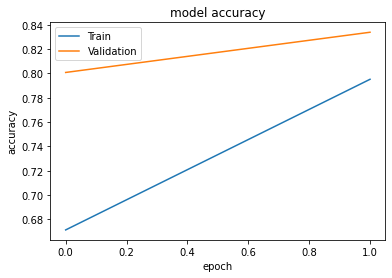

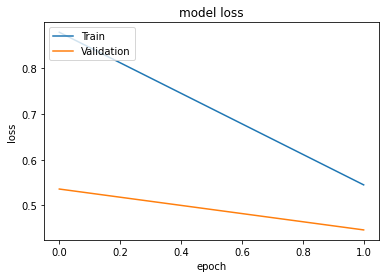

In [8]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Predicting the Test set results

In [9]:

score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
pred = model.predict(X_test) 
y_pred = np.argmax(pred, axis = 1) 


  1/125 [..............................] - ETA: 26s - loss: 0.5053 - accuracy: 0.8750

 11/125 [=>............................] - ETA: 0s - loss: 0.4282 - accuracy: 0.8580 

 21/125 [====>.........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.8497

 34/125 [=======>......................] - ETA: 0s - loss: 0.4322 - accuracy: 0.8410

 47/125 [==========>...................] - ETA: 0s - loss: 0.4324 - accuracy: 0.8431

 58/125 [============>.................] - ETA: 0s - loss: 0.4166 - accuracy: 0.8508

 69/125 [===============>..............] - ETA: 0s - loss: 0.4179 - accuracy: 0.8478

 80/125 [==================>...........] - ETA: 0s - loss: 0.4159 - accuracy: 0.8480

 92/125 [=====================>........] - ETA: 0s - loss: 0.4175 - accuracy: 0.8441

104/125 [=======================>......] - ETA: 0s - loss: 0.4198 - accuracy: 0.8453

115/125 [==========================>...] - ETA: 0s - loss: 0.4279 - accuracy: 0.8416

122/125 [============================>.] - ETA: 0s - loss: 0.4279 - accuracy: 0.8414

125/125 [==============================] - 1s 5ms/step - loss: 0.4301 - accuracy: 0.8400


Test loss: 0.43010082840919495
Test accuracy: 0.8399999737739563


## Evaluating the Model Performance

Accuracy Score: 0.84
Precision Score: 0.8425760964473296
Recall Score: 0.916515138991168
F1 Score: 0.8350321330423812


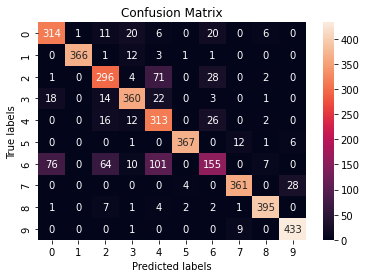

Elapsed CPU Time: 108.94 seconds


In [10]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
import seaborn as sns

acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')**0.5
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Accuracy Score: {acc}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')
print(f'F1 Score: {f1}')

cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm)           
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');           
plt.show()

time_stop = process_time()
cpu_time = round(time_stop - time_start, 2)
print(f'Elapsed CPU Time: {cpu_time} seconds')


## Saving Model Statistics

In [11]:

import os
import json

path = 'statistics'
if not os.path.exists(path):
    os.mkdir(path)

stats = {
    "Accuracy Score": acc,
    "Precision Score": precision,
    "Recall Score": recall,
    "F1 Score": f1,
    "cpu time": cpu_time,
    "predicted": y_pred.flatten().tolist(), 
    "real": y_true.to_numpy().flatten().tolist()
}

with open(os.path.join(path, "cnn_71103630-7d48-11ec-b088-d7c57270a0f7.json"), "w") as f:
    json.dump(stats, f, ensure_ascii=False, indent=4)
